# Nuscene parser for trajectory prediction

In [3]:
from pkyutils import NusToolkit

toolkit = NusToolkit(root='../nus_dataset/original_small/v1.0-mini', version='v1.0-mini', load_dir='../nus_dataset')
toolkit.save_dataset()

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.392 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.
num_samples: 404
directory exists


In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from pkyutils import DatasetQ10

dataset = DatasetQ10(version='v1.0-trainval', load_dir='../nus_dataset', data_partition='train',
                     shuffle=False, val_ratio=0.3, data_type='real', min_angle=np.deg2rad(20), max_angle=None)

import:
pkyutils
total agents: 976


In [4]:
past, past_len, future, future_len, agent_mask, vel, pos, map_img, prior, idx = toolkit[80][1]

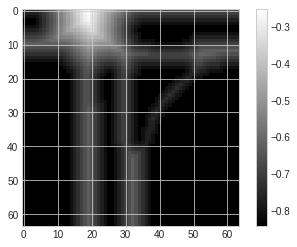

In [5]:
import matplotlib.pyplot as plt

plt.imshow(map_img[0], cmap='gray')
plt.colorbar()

In [6]:
import numpy as np
np.array(map_img)[0].shape

(64, 64)

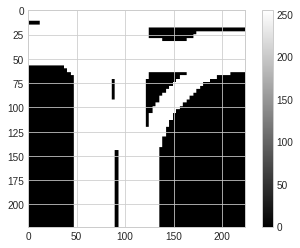

In [7]:
import cv2

map_array = np.asarray(map_img)[0][..., np.newaxis]
map_arr = cv2.resize(map_array, (224, 224))
map_arr[map_arr > np.min(map_arr)] = 255
plt.imshow(map_arr, cmap='gray')
plt.colorbar()

In [63]:
map_array.shape

(64, 64, 1)

In [56]:

map_array = np.asarray(map_img)[0]
# map_array += abs(np.min(map_array))

da_mask = np.any(map_array[..., np.newaxis] > np.min(map_array), axis=-1)

In [57]:
map_array, da_mask

(array([[-0.7341249 , -0.7341249 , -0.7341249 , ..., -0.66092545,
         -0.66092545, -0.66092545],
        [-0.77072465, -0.77072465, -0.77072465, ..., -0.69752514,
         -0.69752514, -0.69752514],
        [-0.8073244 , -0.8073244 , -0.8073244 , ..., -0.7341249 ,
         -0.7341249 , -0.7341249 ],
        ...,
        [-0.8439241 , -0.8439241 , -0.8439241 , ..., -0.8439241 ,
         -0.8439241 , -0.8439241 ],
        [-0.8439241 , -0.8439241 , -0.8439241 , ..., -0.8439241 ,
         -0.8439241 , -0.8439241 ],
        [-0.8439241 , -0.8439241 , -0.8439241 , ..., -0.8439241 ,
         -0.8439241 , -0.8439241 ]], dtype=float32),
 array([[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]))

In [34]:
map_array[1]

array([-0.77072465, -0.77072465, -0.77072465, -0.77072465, -0.76351815,
       -0.7414449 , -0.7122785 , -0.68311226, -0.6465125 , -0.60991275,
       -0.573313  , -0.53671324, -0.5001135 , -0.4635138 , -0.42691407,
       -0.39031434, -0.3537146 , -0.31711486, -0.2805151 , -0.25889564,
       -0.2954954 , -0.33209512, -0.36869484, -0.4052946 , -0.44189432,
       -0.47106066, -0.500227  , -0.5293933 , -0.55855966, -0.58772594,
       -0.60979927, -0.63896555, -0.66103894, -0.68311226, -0.6903187 ,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514, -0.69752514,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514, -0.69752514,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514, -0.69752514,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514, -0.69752514,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514, -0.69752514,
       -0.69752514, -0.69752514, -0.69752514, -0.69752514], dtype=float32)

In [22]:
past.shape, future.shape

((8, 4, 2), (8, 6, 2))

In [24]:
calculateCurve(future[0])

0.0005439152949239137

In [12]:
np.sqrt(32*32*2)

45.254833995939045

In [8]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [9]:
def calculateCurve(points):
    if len(points) < 3:
        return 0.0
    
    a = points[1] - points[0]
    b = points[-1] - points[0]
    
    if np.linalg.norm(a) == 0 or np.linalg.norm(b) < 5.0:
        return 0.0
    
    au = a / np.linalg.norm(a)
    bu = b / np.linalg.norm(b)
    return np.arccos(np.clip(np.dot(au, bu), -1.0, 1.0))

In [7]:
vel

array([[ -0.86213698, -10.68632391],
       [  8.13047224,   8.73351307],
       [  1.51212326,  -1.30650979],
       [ -0.99831866,   2.7682782 ],
       [ -2.24661124,  -1.94022886]])

In [1]:
idx = 280
past, past_len, future, future_len, agent_mask, vel, pos, map_img, prior, idx = toolkit[idx][0]

for points in future:
    plt.title(calculateCurve(points))
    plt.plot(points[:, 0], points[:, 1])
    plt.xlim([-50, 50])
    plt.ylim([-50, 50])
#     plt.axis('equal')
    plt.show()

NameError: name 'toolkit' is not defined

In [36]:
np.rad2deg(0.168)

9.625690958197831

In [1]:
import numpy as np

In [3]:
np.random.randint(low=1, high=1)

ValueError: low >= high

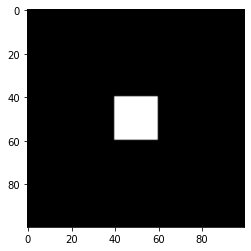

In [99]:
import matplotlib.pyplot as plt

asdf = np.zeros((100,100,3))
asdf[40:60, 40:60, :] = 255.
plt.imshow(asdf.astype(np.int64))
plt.show()

In [112]:
cv2.cvtColor(asdf.astype(np.uint8), cv2.COLOR_BGR2GRAY).shape

(100, 100)

In [114]:
asdf.astype(np.uint8).shape

(100, 100, 3)

In [95]:
import cv2

test = cv2.distanceTransform(cv2.cvtColor(asdf.astype(np.uint8), cv2.COLOR_BGR2GRAY), cv2.DIST_L2, 5)

In [97]:
test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

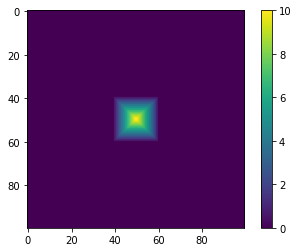

In [98]:
plt.imshow(test)
plt.colorbar()

In [24]:
thresh = cv2.bitwise_not(asdf)

In [25]:
thresh

array([[        nan,         nan,         nan],
       [        nan, -0.01574707,         nan],
       [        nan,         nan,         nan]])

In [44]:
asdf.reshape((3, 3, 1))

array([[[  0.],
        [  0.],
        [  0.]],

       [[  0.],
        [255.],
        [  0.]],

       [[  0.],
        [  0.],
        [  0.]]])

In [1]:
from rasterization_q10.generator import NusLoaderQ10

# DATAROOT='/datasets/nuscene/v1.0-mini'
DATAROOT='../v1.0-trainval_meta'

sampling_time = 3
agent_time = 0 # zero for static mask, non-zero for overlap

layer_names = ['drivable_area', 'road_segment', 'road_block',
               'lane', 'ped_crossing', 'walkway', 'stop_line',
               'carpark_area', 'road_divider', 'lane_divider']
colors = [(255, 255, 255), (255, 255, 255), (255, 255, 255),
          (255, 255, 255), (255, 255, 255), (255, 255, 255), (255, 255, 255),
          (255, 255, 255), (255, 255, 255), (255, 255, 255),]

dataset = NusLoaderQ10(
    root=DATAROOT, sampling_time=sampling_time, 
    agent_time=agent_time, layer_names=layer_names)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 26.287 seconds.
Reverse indexing ...
Done reverse indexing in 7.1 seconds.


In [2]:
print("num_samples: {}".format(len(dataset)))

num_samples: 34149


In [3]:
map_masks, agent_masks, agents, idx = dataset[100] # 100th sample
print(map_masks.shape)
print(agent_masks.shape)
print(len(agents))
print(agents[0].keys())

(11, 500, 500, 3)


/home/q10/.pyenv/versions/intelpro/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


AttributeError: 'tuple' object has no attribute 'shape'

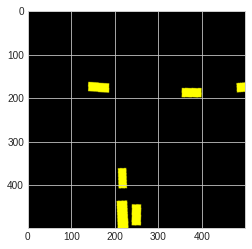

In [9]:
import matplotlib.pyplot as plt

plt.imshow(dataset[100][1][0])

In [1]:
from rasterization_q10.generator import NusLoaderQ10

DATAROOT='/datasets/nuscene/v1.0-mini'

sampling_time = 3
agent_time = 0 # zero for static mask, non-zero for overlap

layer_names = ['drivable_area', 'road_segment', 'road_block',
               'lane', 'ped_crossing', 'walkway', 'stop_line',
               'carpark_area', 'road_divider', 'lane_divider']
colors = [(255, 255, 255), (255, 255, 255), (255, 255, 255),
          (255, 255, 255), (255, 255, 255), (255, 255, 255), (255, 255, 255),
          (255, 255, 255), (255, 255, 255), (255, 255, 255),]

dataset = NusLoaderQ10(
    root=DATAROOT, sampling_time=sampling_time, 
    agent_time=agent_time, layer_names=layer_names)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.322 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
print("num_samples: {}".format(len(dataset)))

num_samples: 404


In [3]:
map_masks, agent_masks, agents, idx = dataset[100] # 100th sample
print(map_masks.shape)
print(agent_masks.shape)
print(len(agents))
print(agents[0].keys())

(10, 800, 800)
(500, 500, 3)
51
dict_keys(['present_pos', 'past_pos', 'future_pos', 'rot', 'vel', 'accel', 'yaw_rate', 'present_local_xy', 'past_local_xy', 'future_local_xy', 'curvature'])


# Usage

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

batch_size = 32

dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# for batch_idx, samples in enumerate(dataloader):
#     print(batch_idx)
    
#     '''
#     do something
    
#     '''
#     pass

## 1. map_masks

In [6]:
print(map_masks.shape)

(10, 800, 800)


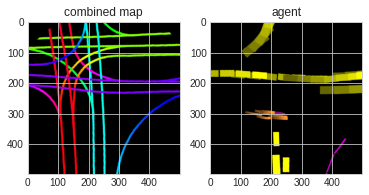

In [7]:
dataset.render_map(idx, combined=True)

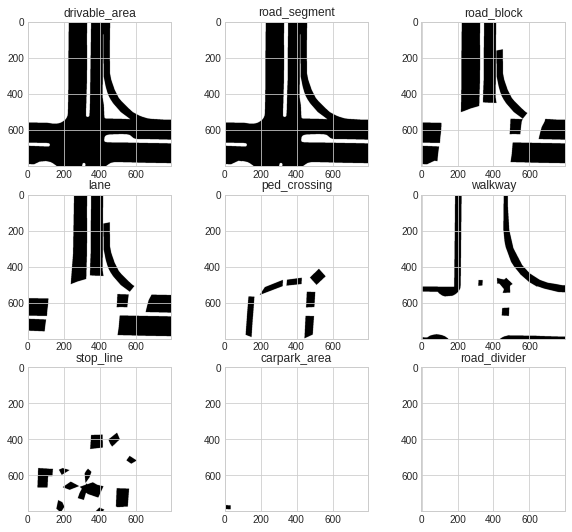

In [8]:
dataset.render_map(idx, combined=False)

## 2. agent_masks

In [9]:
print(agent_masks.shape)

(500, 500, 3)


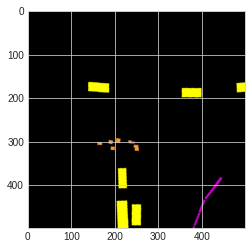

In [10]:
plt.imshow(agent_masks)
plt.show()

## 3. agent states

__1. Trajectory__  
    - present, past, future  
    - global & local  
    - curvature (for diverse sampling)  
__2. States__  
    - rot, vel, accel, yaw_rate  

In [11]:
print(len(agents))
print(agents[0].keys())

51
dict_keys(['present_pos', 'past_pos', 'future_pos', 'rot', 'vel', 'accel', 'yaw_rate', 'present_local_xy', 'past_local_xy', 'future_local_xy', 'curvature'])


In [12]:
agents[0]

{'present_pos': [1303.702, 1038.36, 0.775],
 'past_pos': array([[1303.118, 1037.841],
        [1302.534, 1037.321],
        [1301.964, 1036.88 ],
        [1301.393, 1036.439],
        [1300.823, 1035.999],
        [1300.241, 1035.575]]),
 'future_pos': array([[1304.286, 1038.88 ],
        [1304.87 , 1039.4  ],
        [1305.454, 1039.92 ],
        [1305.861, 1040.444],
        [1306.312, 1041.027],
        [1306.763, 1041.609]]),
 'rot': [0.924033835235088, 0.0, 0.0, 0.3823107000081665],
 'vel': 1.5647049469509007,
 'accel': 0.0007583506154782024,
 'yaw_rate': 0.006983004434575569,
 'present_local_xy': array([[-8.60534425,  9.31069525]]),
 'past_local_xy': array([[ -9.38132702,   9.40162233],
        [-10.15805656,   9.49188433],
        [-10.86648059,   9.62423382],
        [-11.57556972,   9.75733008],
        [-12.28324699,   9.89034467],
        [-12.98695715,  10.04296186]]),
 'future_local_xy': array([[-7.82861471,  9.22043326],
        [-7.05188517,  9.13017127],
        [-6.275

## Visualization

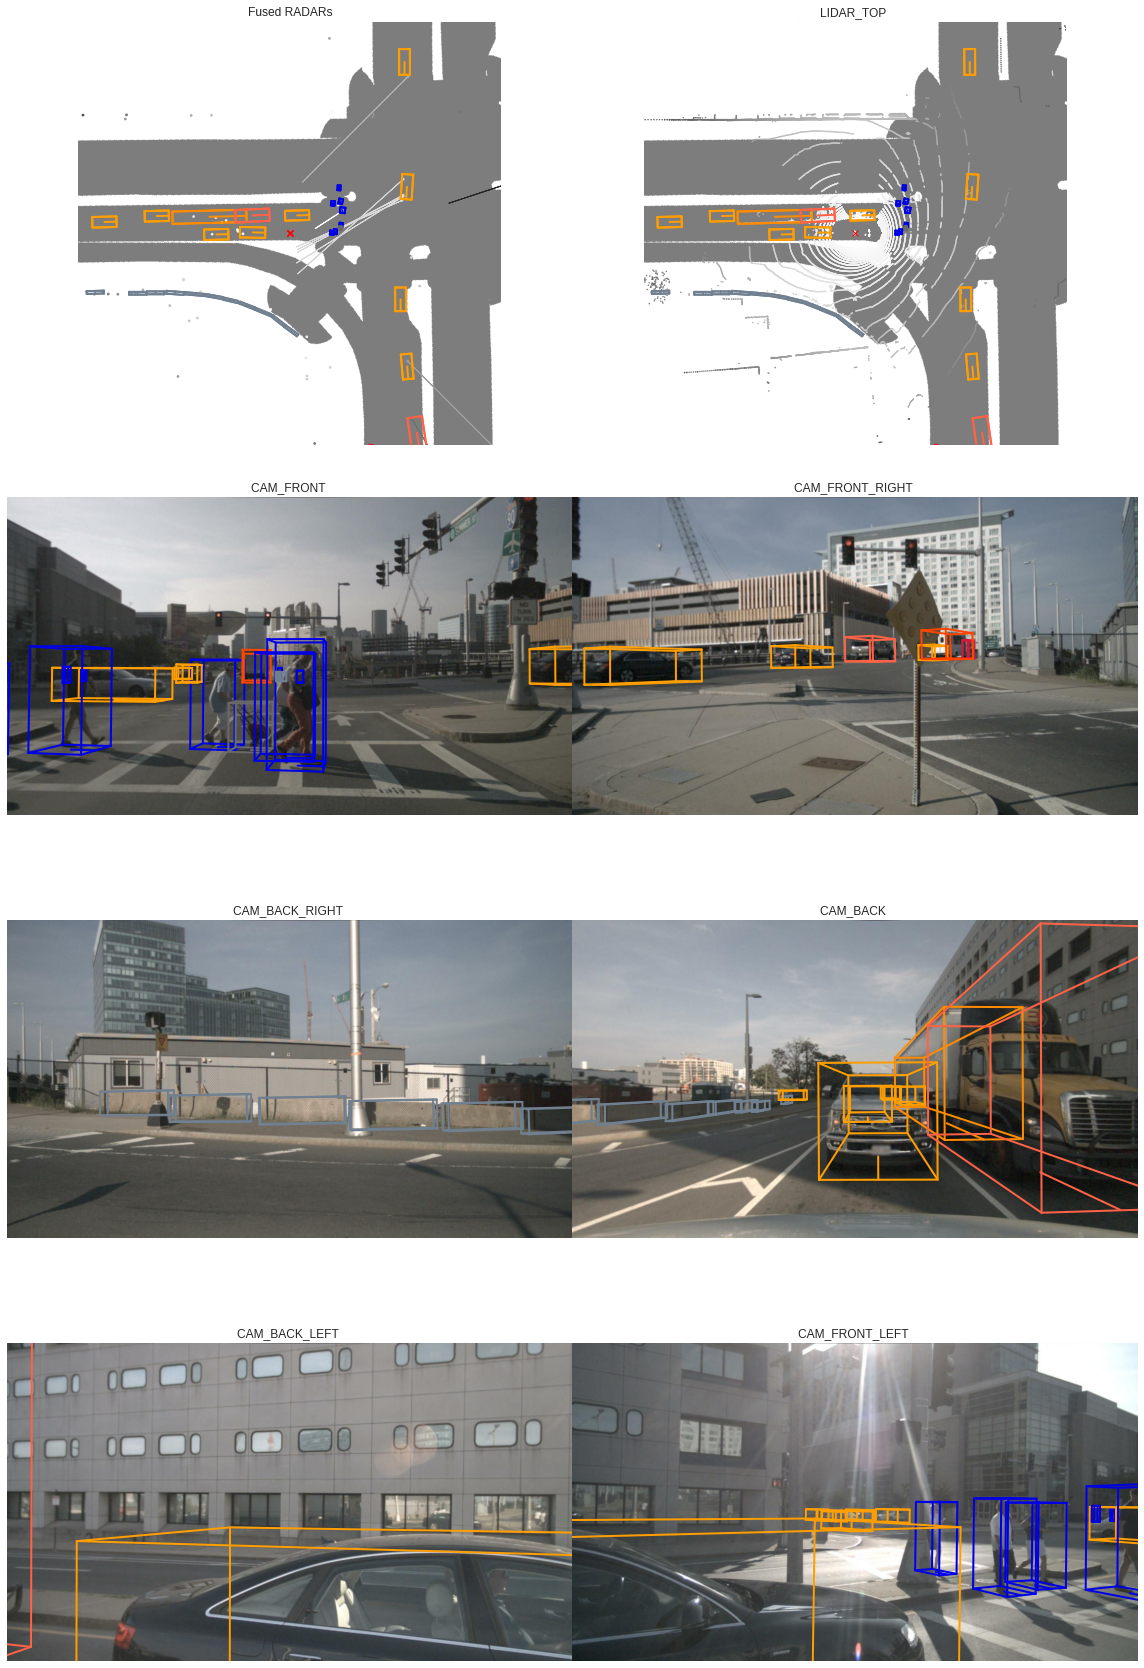

In [13]:
dataset.render_sample(idx)

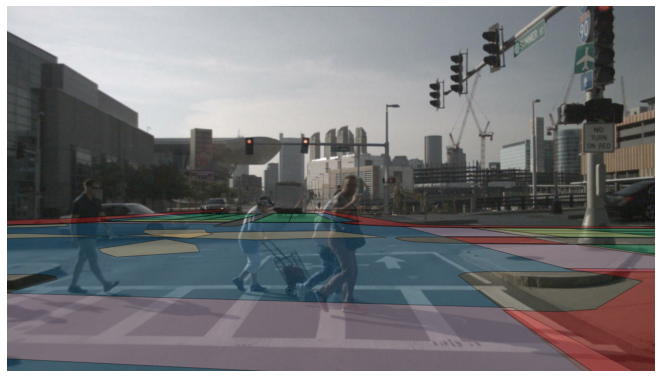

In [14]:
dataset.render_scene(idx)